1.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. 读取数据
file_path = r'D:\bike.csv'
df = pd.read_csv(file_path)

# 2. 数据清洗
# 删除id列
df.drop(columns=['id'], inplace=True)

# 筛选出上海市数据并删除city列
df_shanghai = df[df['city'] == 1].drop(columns=['city'])

# 根据小时（hour）列进行转换
df_shanghai['hour'] = df_shanghai['hour'].apply(lambda x: 1 if 6 <= x <= 18 else 0)

# 3. 提取目标列y，并转换为Numpy数组
y = df_shanghai['y'].values
df_shanghai.drop(columns=['y'], inplace=True)

# 4. 数据集转换为Numpy数组
X = df_shanghai.values

# 5. 拆分数据集：80%训练集，20%测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. 数据归一化
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# 7. 构建并训练线性回归模型
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# 8. 评估模型
y_pred_scaled = model.predict(X_test_scaled)

# 反归一化
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test_scaled)

# 计算RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 31.568478635113294


2.

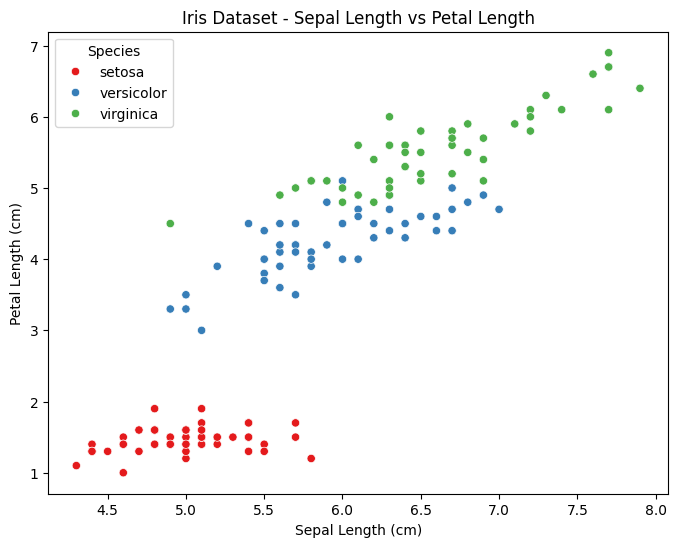

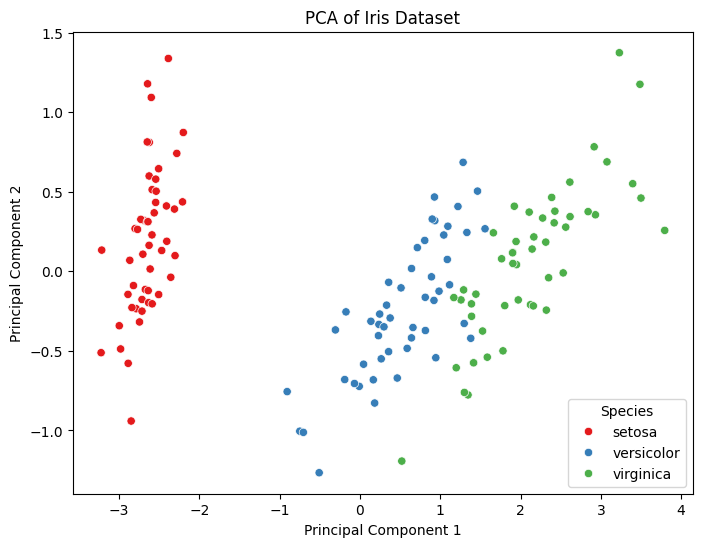

Accuracy of KNN classifier (K=3): 1.0000


In [4]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

# 1. 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2. 划分训练集与测试集，训练集比例为0.2，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 绘制花萼长度与花瓣长度的散点图
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 2], hue=iris.target_names[y], palette='Set1')
plt.title("Iris Dataset - Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()

# 4. 对特征进行PCA降维，并可视化降维后的结果
pca = PCA(n_components=2)  # 保留前两个主成分
X_pca = pca.fit_transform(X)

# 绘制PCA降维后的数据点
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=iris.target_names[y], palette='Set1')
plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Species")
plt.show()

# 5. 使用KNN算法进行训练，K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 6. 在测试集上进行预测
y_pred = knn.predict(X_test)

# 7. 输出分类准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier (K=3): {accuracy:.4f}")
